<a href="https://colab.research.google.com/github/rdtzaa/tg-4-praktikum/blob/main/Praktikum_TG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Koordinat X: 1
Koordinat Y: 1
Sedang mencari solusi Knight's Tour mulai dari (1, 1)...
Solusi Ditemukan!

Matriks Langkah:
[[54 13 40  1 46 23 38  3]
 [41  0 53 24 39  2 47 22]
 [14 55 12 45 52 49  4 37]
 [11 42 63 50 25 44 21 48]
 [56 15 32 43 58 51 36  5]
 [31 10 57 62 35 26 59 20]
 [16 33  8 29 18 61  6 27]
 [ 9 30 17 34  7 28 19 60]]


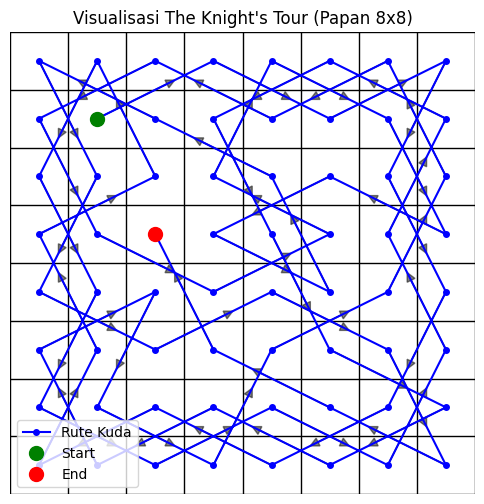

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 8  # Ukuran Papan 8x8

MOVES = [
    (2, 1), (1, 2), (-1, 2), (-2, 1),
    (-2, -1), (-1, -2), (1, -2), (2, -1)
]

def is_safe(x, y, board):
    """Mengecek apakah langkah berada di dalam papan dan belum dikunjungi."""
    return 0 <= x < N and 0 <= y < N and board[x][y] == -1

def get_degree(x, y, board):
    """
    Menghitung jumlah langkah legal berikutnya dari posisi (x, y).
    Ini adalah inti dari Warnsdorff's Rule.
    """
    count = 0
    for dx, dy in MOVES:
        if is_safe(x + dx, y + dy, board):
            count += 1
    return count

def solve_knights_tour(board, curr_x, curr_y, pos, closed_tour=False, start_node=None):
    """
    Fungsi rekursif Backtracking dengan Heuristik Warnsdorff.
    """
    if pos == N * N:
        if closed_tour:
            sx, sy = start_node
            for dx, dy in MOVES:
                if (curr_x + dx == sx) and (curr_y + dy == sy):
                    return True
            return False
        return True

    next_moves = []
    for dx, dy in MOVES:
        nx, ny = curr_x + dx, curr_y + dy
        if is_safe(nx, ny, board):
            degree = get_degree(nx, ny, board)
            next_moves.append((degree, nx, ny))

    next_moves.sort(key=lambda x: x[0])

    for _, nx, ny in next_moves:
        board[nx][ny] = pos # Tandai langkah

        if solve_knights_tour(board, nx, ny, pos + 1, closed_tour, start_node):
            return True

        board[nx][ny] = -1 # Backtrack (hapus langkah jika gagal)

    return False

def visualize_tour(board, path_coords):
    """
    Membuat visualisasi grafis rute perjalanan seperti pada soal.
    """
    fig, ax = plt.subplots(figsize=(6, 6))

    # Gambar Grid
    for x in range(N + 1):
        ax.plot([0, N], [x, x], 'k-', lw=1)
        ax.plot([x, x], [0, N], 'k-', lw=1)

    plot_x = []
    plot_y = []

    for r, c in path_coords:
        plot_x.append(c + 0.5)      # Tengahkan di kolom
        plot_y.append(N - 1 - r + 0.5) # Tengahkan di baris (flip vertical)

    # Plot garis rute
    ax.plot(plot_x, plot_y, 'b-', marker='o', markersize=4, linewidth=1.5, label='Rute Kuda')

    # Tandai Awal (Hijau) dan Akhir (Merah)
    ax.plot(plot_x[0], plot_y[0], 'go', markersize=10, label='Start')
    ax.plot(plot_x[-1], plot_y[-1], 'ro', markersize=10, label='End')

    # Panah arah pergerakan (opsional, ambil beberapa sampel agar tidak penuh)
    for i in range(0, len(plot_x)-1, 1):
        ax.arrow(plot_x[i], plot_y[i],
                 (plot_x[i+1]-plot_x[i])*0.6, (plot_y[i+1]-plot_y[i])*0.6,
                 head_width=0.15, head_length=0.15, fc='k', ec='k', alpha=0.5)

    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.axis('off')
    plt.title("Visualisasi The Knight's Tour (Papan 8x8)")
    plt.legend()
    plt.show()

def main():
    board = [[-1 for _ in range(N)] for _ in range(N)]

    start_x = int(input("Koordinat X: "))
    start_y = int(input("Koordinat Y: "))

    is_closed_tour = False

    # Langkah pertama
    board[start_x][start_y] = 0

    print(f"Sedang mencari solusi Knight's Tour mulai dari ({start_x}, {start_y})...")

    if solve_knights_tour(board, start_x, start_y, 1, is_closed_tour, (start_x, start_y)):
        print("Solusi Ditemukan!")

        path_dict = {}
        for r in range(N):
            for c in range(N):
                path_dict[board[r][c]] = (r, c)

        sorted_path = [path_dict[i] for i in range(N*N)]

        # Tampilkan Papan dalam teks
        print("\nMatriks Langkah:")
        print(np.array(board))

        # Tampilkan Visualisasi Grafik
        visualize_tour(board, sorted_path)
    else:
        print("Solusi tidak ditemukan (Coba posisi awal lain atau mode Open Tour).")

if __name__ == "__main__":
    main()

Input the array lengh: 4
data 1: 2
data 2: 1
data 3: 5
data 4: 3


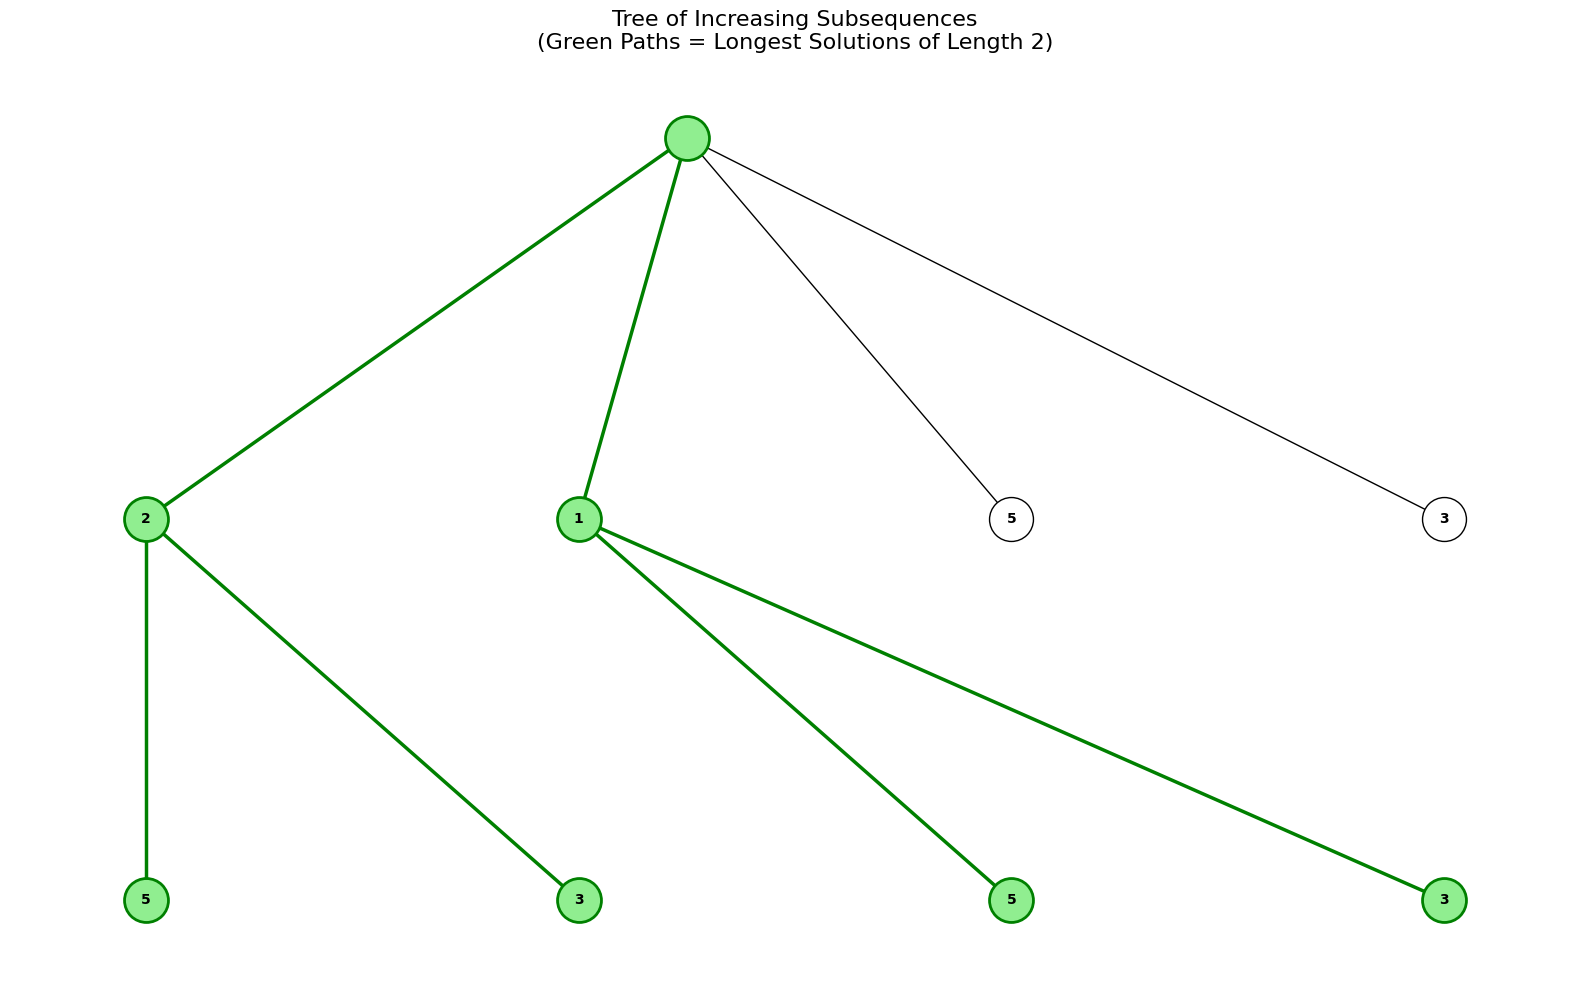

Found 4 Longest Increasing Subsequences (Length 4):
[1, 3]
[1, 5]
[2, 3]
[2, 5]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import collections

def solve_and_visualize_lis_tree(sequence):
    # --- Step 1: Build the Tree (Exploration) ---
    G = nx.DiGraph()
    node_counter = 0

    # Root Node (The empty circle at the top)
    # We store: value, original index in sequence, depth (length of subsequence so far)
    root_id = node_counter
    G.add_node(root_id, label="", value=float('-inf'), original_idx=-1, depth=0)
    node_counter += 1

    # Queue for BFS: stores parent_id
    queue = collections.deque([root_id])

    max_depth_found = 0

    while queue:
        parent_id = queue.popleft()
        parent_data = G.nodes[parent_id]
        parent_val = parent_data['value']
        parent_idx = parent_data['original_idx']
        parent_depth = parent_data['depth']

        # Try to extend the subsequence with any valid number appearing AFTER parent_idx
        for i in range(parent_idx + 1, len(sequence)):
            curr_val = sequence[i]

            # Constraint: Must be strictly increasing
            if curr_val > parent_val:
                new_node_id = node_counter
                node_counter += 1
                current_depth = parent_depth + 1

                # Update global max depth if we found a longer path
                if current_depth > max_depth_found:
                    max_depth_found = current_depth

                G.add_node(new_node_id,
                           label=str(curr_val),
                           value=curr_val,
                           original_idx=i,
                           depth=current_depth)

                G.add_edge(parent_id, new_node_id)
                queue.append(new_node_id)

    # --- Step 2: Identify Solution Paths (Backtracking) ---
    # We want to color only the nodes/edges that are part of a path of length `max_depth_found`

    solution_nodes = set()
    solution_edges = set()

    # Start with all leaf nodes at the maximum depth
    # (These are the ends of our winning solutions)
    nodes_to_trace = [n for n in G.nodes if G.nodes[n]['depth'] == max_depth_found]

    # Trace back up to the root to mark the path
    while nodes_to_trace:
        curr = nodes_to_trace.pop()
        solution_nodes.add(curr)

        # Find predecessors (parents) in the tree
        preds = list(G.predecessors(curr))
        for p in preds:
            solution_edges.add((p, curr))
            if p not in solution_nodes:
                solution_nodes.add(p)
                nodes_to_trace.append(p)

    # --- Step 3: Extract Solution Lists for Text Output ---
    # Just to print the answers clearly in the console
    all_solutions = []
    def get_paths(curr_node, current_path):
        # If we are at max depth, we found a solution
        if G.nodes[curr_node]['depth'] == max_depth_found:
            # Filter out the dummy root value (-inf)
            valid_path = [x for x in current_path if x != float('-inf')]
            all_solutions.append(valid_path)
            return

        for child in G.successors(curr_node):
            if child in solution_nodes: # Only follow winning paths
                val = G.nodes[child]['value']
                get_paths(child, current_path + [val])

    get_paths(root_id, [])
    # Sort for cleaner output
    all_solutions.sort()

    # --- Step 4: Visualization (Matplotlib) ---
    # Layout calculation (Manual Hierarchy)
    pos = {}
    depth_counts = collections.defaultdict(int)
    for node in G.nodes():
        d = G.nodes[node]['depth']
        depth_counts[d] += 1

    depth_current_pos = collections.defaultdict(int)

    for node in G.nodes():
        depth = G.nodes[node]['depth']
        num_nodes_in_layer = depth_counts[depth]

        # Spacing logic
        width = max(num_nodes_in_layer * 1.5, 2)
        x_start = -(width / 2.0) + 0.5 if num_nodes_in_layer > 1 else 0
        x_step = width / (num_nodes_in_layer - 1) if num_nodes_in_layer > 1 else 0

        x_pos = x_start + (depth_current_pos[depth] * x_step)
        y_pos = -depth * 2

        pos[node] = (x_pos, y_pos)
        depth_current_pos[depth] += 1

    plt.figure(figsize=(16, 10))
    ax = plt.gca()

    # Separate graph components into "Solution" and "Non-Solution"
    non_sol_nodes = [n for n in G.nodes if n not in solution_nodes]
    non_sol_edges = [e for e in G.edges if e not in solution_edges]
    sol_edges_list = list(solution_edges)
    sol_nodes_list = list(solution_nodes)

    # DRAW NON-SOLUTIONS (Standard Style)
    nx.draw_networkx_nodes(G, pos, nodelist=non_sol_nodes, node_color='white', edgecolors='black', node_size=1000, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=non_sol_edges, edge_color='black', width=1, arrows=False, ax=ax)

    # DRAW SOLUTIONS (Highlighted Style - Green)
    # Using a light green fill for nodes to make text readable
    nx.draw_networkx_nodes(G, pos, nodelist=sol_nodes_list, node_color='#90EE90', edgecolors='green', linewidths=2, node_size=1000, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=sol_edges_list, edge_color='green', width=2.5, arrows=False, ax=ax)

    # DRAW LABELS
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold', ax=ax)

    plt.title(f"Tree of Increasing Subsequences\n(Green Paths = Longest Solutions of Length {max_depth_found})", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return all_solutions

# --- Execute ---
n = int(input("Input the array lengh: "))
data = []
for i in range(n):
  k = int(input(f"data {i+1}: "))
  data.append(k)

solutions = solve_and_visualize_lis_tree(data)

print(f"Found {len(solutions)} Longest Increasing Subsequences (Length 4):")
for s in solutions:
    print(s)